In [74]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression
import pandas as pd
import tensorflow as tf

# Import relevant metrics from scikit-learn
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

#  Import and read the csv.
import pandas as pd
house_df = pd.read_csv("train_processed.csv")
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Distance from 2008,Adjusted Sale Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,0,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,1,191483
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,0,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,2,155400
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,0,250000


In [75]:
house_df.dtypes

Id                       int64
MSSubClass               int64
MSZoning                object
LotFrontage            float64
LotArea                  int64
                        ...   
SaleType                object
SaleCondition           object
SalePrice                int64
Distance from 2008       int64
Adjusted Sale Price      int64
Length: 83, dtype: object

In [76]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
house_df = house_df.drop(columns=["Id","Alley","LandSlope","RoofMatl","Condition2","Exterior1st","Exterior2nd","MasVnrType","MasVnrArea","BsmtExposure","BsmtFinType1","BsmtFinType2","BsmtFinSF2","Heating","SaleCondition","SaleType","YrSold","MoSold","MiscVal","MiscFeature","ScreenPorch","3SsnPorch","LowQualFinSF","Electrical","Distance from 2008","Adjusted Sale Price","PoolQC","Fence","GarageQual","GarageCond","GarageYrBlt","FireplaceQu","KitchenQual","BsmtQual","BsmtCond","RoofStyle"])

In [77]:
house_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,Neighborhood,...,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,CollgCr,...,Attchd,RFn,2,548,Y,0,61,0,0,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Veenker,...,Attchd,RFn,2,460,Y,298,0,0,0,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,CollgCr,...,Attchd,RFn,2,608,Y,0,42,0,0,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Crawfor,...,Detchd,Unf,3,642,Y,0,35,272,0,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,NoRidge,...,Attchd,RFn,3,836,Y,192,84,0,0,250000


In [78]:
house_df.values.reshape(-1, 47)

array([[60, 'RL', 65.0, ..., 0, 0, 208500],
       [20, 'RL', 80.0, ..., 0, 0, 181500],
       [60, 'RL', 68.0, ..., 0, 0, 223500],
       ...,
       [70, 'RL', 66.0, ..., 0, 0, 266500],
       [20, 'RL', 68.0, ..., 112, 0, 142125],
       [20, 'RL', 75.0, ..., 0, 0, 147500]], dtype=object)

In [79]:
# Determine the number of unique values in each column.
house_df.nunique()

MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
Neighborhood       25
Condition1          9
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
ExterQual           4
ExterCond           5
Foundation          6
BsmtFinSF1        637
BsmtUnfSF         780
TotalBsmtSF       721
HeatingQC           5
CentralAir          2
1stFlrSF          753
2ndFlrSF          417
GrLivArea         861
BsmtFullBath        4
BsmtHalfBath        3
FullBath            4
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
TotRmsAbvGrd       12
Functional          7
Fireplaces          4
GarageType          6
GarageFinish        3
GarageCars          5
GarageArea        441
PavedDrive          3
WoodDeckSF        274
OpenPorchSF       202
EnclosedPorch     120
PoolArea  

In [80]:
cat_col = house_df.dtypes[house_df.dtypes == "object"].index.tolist()


In [81]:
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(house_df[cat_col]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(cat_col)
encode_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,GarageType_CarPort,GarageType_Detchd,GarageType_nan,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_nan,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [82]:
len(cat_col)

merged_df = house_df.merge(encode_df,left_index=True, right_index=True).drop(columns=cat_col)
merged_df = merged_df.fillna(0)
merged_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,GarageType_CarPort,GarageType_Detchd,GarageType_nan,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_nan,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,60,65.0,8450,7,5,2003,2003,706,150,856,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,20,80.0,9600,6,8,1976,1976,978,284,1262,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,60,68.0,11250,7,5,2001,2002,486,434,920,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,70,60.0,9550,7,5,1915,1970,216,540,756,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,60,84.0,14260,8,5,2000,2000,655,490,1145,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0,953,953,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1456,20,85.0,13175,6,6,1978,1988,790,589,1542,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1457,70,66.0,9042,7,9,1941,2006,275,877,1152,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1458,20,68.0,9717,5,6,1950,1996,49,0,1078,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [83]:
train_df = merged_df.copy()

In [84]:
y = train_df['SalePrice']

X = train_df.drop(columns=['SalePrice']).values.reshape(-1, 139)
X

array([[6.000e+01, 6.500e+01, 8.450e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [2.000e+01, 8.000e+01, 9.600e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [6.000e+01, 6.800e+01, 1.125e+04, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [7.000e+01, 6.600e+01, 9.042e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [2.000e+01, 6.800e+01, 9.717e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [2.000e+01, 7.500e+01, 9.937e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00]])

In [85]:
model = LinearRegression()

model.fit(X, y)

LinearRegression()

In [86]:
# Display the slope
print(f"Model's slope: {model.coef_}")

Model's slope: [-1.79834769e+02 -1.22201486e+01  4.16991576e-01  1.04973045e+04
  5.00315147e+03  1.94595757e+02  5.69234935e+01  4.34173950e+00
 -6.68790456e+00  9.25788481e+00  3.63440321e+00  2.36452946e+01
  4.42144123e+01  7.37936541e+03  5.22694715e+03  6.75842429e+03
  4.47912956e+03 -5.57653832e+03 -1.82135304e+04  2.95902017e+03
  4.89389760e+03  1.51734935e+04 -9.01817120e+00  1.63232870e+01
  4.36029065e+00  5.34311415e+00 -4.79233644e+00 -1.78095148e+04
  5.13460579e+03  3.19743807e+03  4.49381791e+03  4.98365298e+03
 -1.10728819e+04  1.10728819e+04  6.33492730e+03  1.23781752e+04
 -2.62651698e+04  7.55206726e+03 -1.57567672e+04  1.16101997e+04
  3.98428868e+03  1.62278820e+02  3.05601534e+04 -3.05601534e+04
  3.82324700e+03  1.35393206e+04 -4.59451460e+03 -1.72416141e+04
  4.47356112e+03 -4.44073531e+03 -6.59938385e+03  1.04079203e+04
 -4.90316873e+03 -7.25206838e+03 -6.26804401e+03  9.46467264e+03
 -2.33849519e+04 -1.77096485e+04 -1.12629808e+04  4.83496333e+03
 -1.724907

In [87]:
# Display the y-intercept
print(f"Model's y-intercept: {model.intercept_}")

Model's y-intercept: -595212.7193283646


In [88]:
predicted_y_values = model.predict(X)

In [89]:
# Create a copy of the original data
df_predicted = train_df.copy()

# Add a column with the predicted salary values
df_predicted["SalePrice_predicted"] = predicted_y_values

df_with_predicted_y = house_df.copy()
df_with_predicted_y["SalePrice_predicted"] = predicted_y_values

# Display sample data
df_predicted[['SalePrice','SalePrice_predicted']].head(10)

,SalePrice,SalePrice_predicted
0,208500,213768.544970
1,181500,204331.225094
2,223500,213202.725147
3,140000,198296.764657
4,250000,304130.615654
5,143000,141343.677970
6,307000,268862.084535
7,200000,213502.780102
8,129900,144902.043264
9,118000,106671.125233


In [73]:
# Compute metrics for the linear regression model: score, r2, mse, rmse, std
score = model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

# Print relevant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.8721757424140116.
The r2 is 0.8721757424140116.
The mean squared error is 806160568.6740599.
The root mean squared error is 28392.96688748923.
The standard deviation is 79415.29188606751.


In [90]:
# Format the results
metrics_data = {
    "Metric": ["Score", "R²", "Mean Squared Error", "Root Mean Squared Error", "Standard Deviation"],
    "Value": [score, r2, mse, rmse, std]
}
# Create DataFrame
metrics_df = pd.DataFrame(metrics_data)
print(metrics_df)

                    Metric         Value
0                    Score  8.721757e-01
1                       R²  8.721757e-01
2       Mean Squared Error  8.061606e+08
3  Root Mean Squared Error  2.839297e+04
4       Standard Deviation  7.941529e+04


In [91]:
from matplotlib import pyplot

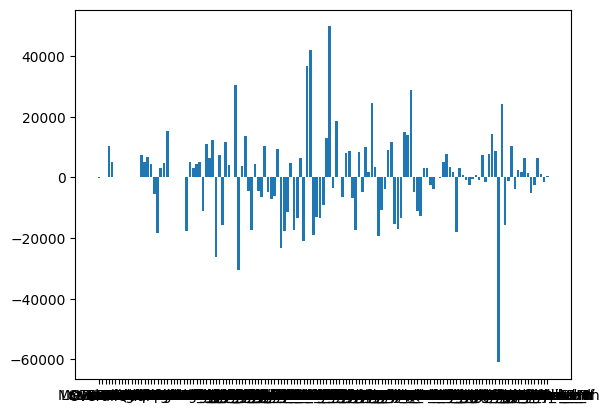

In [92]:
# Analysis on importance of the features

importance = model.coef_
# summarize feature importance
#for i,v in enumerate(importance):
# print('Feature: %0d, Score: %.2f' % (i,v))
# plot feature importance
features = train_df.drop(columns=['SalePrice']).columns.values.tolist()
#print(columns)
pyplot.bar([features[x] for x in range(len(importance))], importance)
pyplot.show()

In [94]:
# Top features with positive impact on sale price

feature_impact = pd.DataFrame(
    {'feature': features,
     'impact': importance
    })
feature_impact_desc = feature_impact.sort_values('impact', ascending=False)
feature_impact_desc.head(10)

,feature,impact
71,Neighborhood_StoneBr,49802.185791
65,Neighborhood_NridgHt,42023.314660
64,Neighborhood_NoRidge,36846.358188
42,Utilities_AllPub,30560.153385
96,ExterQual_Ex,28809.300530
84,BldgType_2fmCon,24615.732488
124,Functional_Typ,24212.447269
73,Neighborhood_Veenker,18473.584360
21,GarageCars,15173.493476
94,HouseStyle_SFoyer,14862.709959


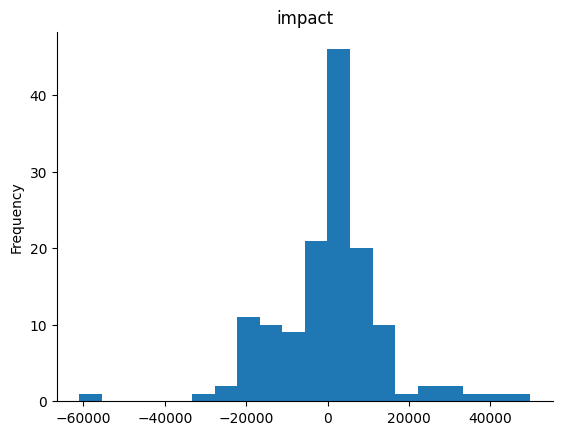

In [ ]:
# @title impact

from matplotlib import pyplot as plt
feature_impact_desc['impact'].plot(kind='hist', bins=20, title='impact')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [95]:
# Top features with negative impact on sale price

feature_impact_asc = feature_impact.sort_values('impact', ascending=True)
feature_impact_asc.head(10)

,feature,impact
123,Functional_Sev,-60951.613109
43,Utilities_NoSeWa,-30560.153385
36,LotShape_IR3,-26265.169799
56,Neighborhood_Edwards,-23384.951916
63,Neighborhood_NWAmes,-21103.676022
86,BldgType_Twnhs,-19162.011517
66,Neighborhood_OldTown,-18823.116482
18,KitchenAbvGr,-18213.530351
110,Foundation_Wood,-17964.563140
27,MSZoning_C (all),-17809.514753
